<div style="text-align: right"> 

### DATA 22100 - Introduction to Machine Learning

</div>

<img src="https://github.com/david-biron/DATA221imgs/blob/main/UChicago_DSI.png?raw=true" align="right" alt="UC-DSI" width="300">



<center> 

# Context Matters and a Classification Loss Function 
    
</center> 

    

## Logistic regression

(the definitions and code are a review - logistic regression was covered in previous courses. The focus here is the interpretation of the results). 



Logistic regression is a **binary classifier** that uses ideas from linear regression to model probabilities. 

The model predicts:

$$\large P(y_i = 1 \mid x_i)$$

where $y_i \in \{0,1\}$ is the binary label and $x_i \in \mathbb{R}^p$ are a vector of features, both for unit $i$.

Question: <br> How can we use techniques from regression to build such a model?

<br>
<br>
<br>
<br>
<br>



### Definition in terms of log odds

Fit a linear regression model **for the log odds**:

$\large 
\begin{equation} \log \frac{P(y_i = 1 \mid x_i)}{P(y_i = 0 \mid x_i)} = \beta_0 + \beta_1 x^i_1 + \dots + \beta_p x^i_p 
\end{equation}
$

<br> 

An equivalent way to write the same thing is

$\large 
\begin{equation} \textrm{logit}(\widehat{p}_i) &=& \log \frac{\widehat{p}_i}{1-\widehat{p}_i} = \beta_0 + \beta^\top x_i \\ 
\textrm{logistic}(\widehat{y}_i) &=& \frac{1}{1+e^{-\widehat{y}_i}} = \widehat{p}_i
\end{equation}
$

where $\widehat{p}_i \equiv P(y_i = 1 \mid x_i)$ is the predicted probability corresponding to response to $x_i$ (i.e., to $y_i \in \{0,1\}$).


(see [logit function](https://en.wikipedia.org/wiki/Logit), [sigmoid (logistic) function](https://en.wikipedia.org/wiki/Sigmoid_function))


<br>
<br>
<br>
<br>
<br>



## Example: the Framingham Heart Disease study 

(the point is **not** to review how to build a logistic regression model, but rather how to assess results with real-world data). 



Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. The Framingham study intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk.

The dataset is publicly available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

The variables (attributes) are fairly self-explanatory.

### Techincal note on switching to statsmodels: 

* Sklearn does not natively provide p-values for regression coefficients (although it is easy to find/write code that adds this function). 
* Also, there are occasional discrepancies between the results of sklearn and statsmodels. For some reason, sklearn LogisticRegression seems to performs more poorly on this dataset.   

In [1]:
import statsmodels.api as sm 
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay 
 
import pandas as pd
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm 
# from sklearn.metrics import mean_squared_error, roc_curve, auc    

fhd_df = pd.read_csv('data/Framingham_heart_disease.csv')
original_len = len(fhd_df)

fhd_df = sm.add_constant(fhd_df)
fhd_df.head()


,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Next: 
* Drop missing values
* Standardize the data
* Split the data
* Create and Fit a model **using statmodels** 
* Print the **statmodels** model summary (coefficients, p-values, various stats)
* Predict and show the confusion matrix

No. of CHD=1: 557


,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,glucose,TenYearCHD,std age,std cigsPerDay,std totChol,std sysBP,std diaBP,std BMI,std heartRate,std glucose
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,...,77.0,0,-1.233351,-0.757068,-0.949714,-1.193695,-1.078415,0.291688,0.356340,-0.203127
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,...,76.0,0,-0.415591,-0.757068,0.297729,-0.514637,-0.159695,0.724614,1.608289,-0.244956
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,...,70.0,0,-0.181945,0.921174,0.184325,-0.220378,-0.243215,-0.109261,-0.060977,-0.495930
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,...,103.0,1,1.336754,1.760294,-0.269291,0.798209,1.009584,0.687717,-0.895610,0.884427
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,...,85.0,0,-0.415591,1.172910,1.091556,-0.107202,0.090864,-0.660258,0.773656,0.131505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1.0,1,58,3.0,0,0.0,0.0,0,1,0,...,81.0,0,0.986285,-0.757068,-1.131161,0.390774,-0.159695,-0.202734,0.356340,-0.035811
4232,1.0,1,68,1.0,0,0.0,0.0,0,1,0,...,79.0,1,2.154514,-0.757068,-1.380649,1.613079,1.176624,-0.650419,-1.312926,-0.119469
4233,1.0,1,50,1.0,1,1.0,0.0,0,1,0,...,86.0,1,0.051701,-0.673156,1.726618,2.111055,0.759024,0.045707,-0.812146,0.173334
4234,1.0,1,51,3.0,1,43.0,0.0,0,0,0,...,68.0,0,0.168524,2.851151,-0.677545,-0.265649,-0.243215,-1.494133,-0.895610,-0.579588


Optimization terminated successfully.
         Current function value: 0.669956
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2559
Model:                          Logit   Df Residuals:                     2551
Method:                           MLE   Df Model:                            7
Date:                Fri, 22 Mar 2024   Pseudo R-squ.:                 -0.5646
Time:                        21:02:43   Log-Likelihood:                -1714.4
converged:                       True   LL-Null:                       -1095.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
std age            0.2732      0.047      5.816      0.000       0.181       0.365
std cigsPerDay   

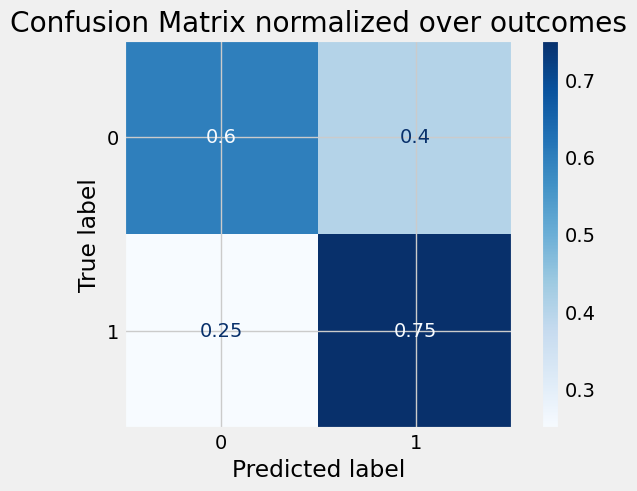

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import f1_score, precision_score, recall_score 

 
import pandas as pd
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# from sklearn.metrics import mean_squared_error, roc_curve, auc    

############################
# Deal with missing values # 
############################

# LogisticRegression does not accept missing values encoded as NaN natively.

# One approach is to replace them with the mean value: 
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp.fit(fhd_df)
#trans_array = imp.transform(fhd_df).T # need to transpose it 
#for k,c in zip(range(trans_array.shape[0]-1), fhd_df.columns[:-1]): # don't fill in outcome column
#    fhd_df[c] = trans_array[k]

# Another approach would be to drop the missing data:
fhd_df = fhd_df.dropna()
#print('%d records remaining (out of %d)\n'%(len(fhd_df), original_len) )
#print('No. of NaNs:\n', fhd_df.isna().sum())

# There are also models that can deal with missing data. 
# We will not go there. 

print(f'No. of CHD=1: {fhd_df.TenYearCHD.sum():d}')

#################################
# Standardize numerical columns #
#################################
cat_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
std_cols = ['std '+c for c in num_cols]

scaler = StandardScaler()
scaler.fit(fhd_df[num_cols]) # get all the means and stds 

# stasndardize columns - subtract means and divide by stds
fhd_df[std_cols] = scaler.transform(fhd_df[num_cols]) 

display(fhd_df)

###############################################
# Split data to training and testing datasets #
###############################################
predictors = ['const'] + std_cols

predictors = std_cols

outcome = 'TenYearCHD'
X_train, X_test, y_train, y_test = train_test_split(fhd_df[predictors], 
                                                    fhd_df[outcome], 
                                                    test_size=0.3)

##############################################
# Initialize an instance of the model object #
##############################################
model = sm.Logit(y_train, X_train)


##########################################
# Train the model / fit model parameters #
##########################################

log_reg = model.fit() 
print(log_reg.summary()) 

########################################
# Predict probabilities with the model #
########################################

p_hat = np.array(log_reg.predict(X_test))
y_hat = p_hat > 0.5
disp = ConfusionMatrixDisplay.from_predictions(
     y_test,
     y_hat, 
     cmap=plt.cm.Blues,
     normalize='true', # Normalized over the true outcomes (rows)  
                       # Shows Type II error rates 
    )
disp.ax_.set_title('Confusion Matrix normalized over outcomes');

print('F1 score = %.3f'%f1_score(y_test, y_hat))     
print('Precision = %.3f'%precision_score(y_test, y_hat))
print('Recall = %.3f\n'%recall_score(y_test, y_hat))







### The F1 score is not great... Should we discard the logistic regression? 

|   |   |
|:--|:--|

 
<details>

<summary><button> $\leftarrow$ What is the predominant issue? </button></summary> 

In the confusion matrix, as displayed, each row (outcome) was normalized separately. 

Still, the *low precision* and *higher recall* suggest that the problem is **predominantly many False Positives** (predicting '1' when the true label is '0', type I error).

 </details>    



|   |   |
|:--|:--|

<details>

<summary><button> $\leftarrow$ What does it mean? </button></summary> 
    
A low F1 score suggests that the model may well be **missing key inputs**.     
    
That said, when screening for heart disease false negatives (type II errors, not raising the alarm when you should have) is more dangerous than false positives (type I errors, false alarms). 
    
A false positive patient can perhaps be examined more closely. The truth about a false negative may become clear too late. 
    
A logistic regression model can **still offer interpretability**. The strength (and even sign) of the effects should be taken with a grain of salt. They *may* change with better input features. 
    
They do, however, offer a clear picture of our **understanding-to-date**.      

</details>  







## Feature selection using the p-values. 

#### Statsmodels calculates the p-values associated with the coefficients (as well as other useful metrics). 

$p>0.05$ (or some other threshold of choice) means that **under the null hypothesis the true coefficient may well be zero**, i.e., the non-zero value we observe is not unlikely enough. 

It would be sensible to simplify the model by keeping only predictors with coefficients that are significantly different from zero. 

When we are **not testing a hypothesis** but rather identifying potentially relevant features, we can use a **more lax threshold**, e.g, $p<0.1$. 


 Taking only the significant features into account:
Optimization terminated successfully.
         Current function value: 0.663815
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2559
Model:                          Logit   Df Residuals:                     2555
Method:                           MLE   Df Model:                            3
Date:                Fri, 22 Mar 2024   Pseudo R-squ.:                 -0.5600
Time:                        21:03:00   Log-Likelihood:                -1698.7
converged:                       True   LL-Null:                       -1088.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
std age            0.2880      0.046      6.291

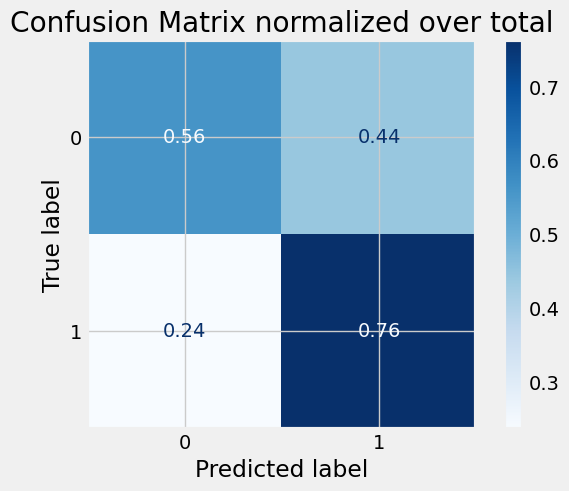

In [12]:
###################################################################
# Train/fit the model again but only with significant predictors #
###################################################################

print('\n Taking only the significant features into account:') 

p_val_threshold = 0.1 # Not really testing a hypothesis - 
                      # just identifying predictors  

pvals = log_reg.pvalues
predictors = list(pvals[pvals<p_val_threshold].index)
outcome = 'TenYearCHD'
X_train, X_test, y_train, y_test = train_test_split(fhd_df[predictors], 
                                                    fhd_df[outcome], 
                                                    test_size=0.3)
model = sm.Logit(y_train, X_train)
log_reg = model.fit() 
print(log_reg.summary()) 
p_hat = np.array(log_reg.predict(X_test))
y_hat = p_hat > 0.5
disp = ConfusionMatrixDisplay.from_predictions(
     y_test,
     y_hat, 
     cmap=plt.cm.Blues,
     normalize='true', # Normalized over the true outcomes (rows)  
                       # Shows Type II error rates 
    )
disp.ax_.set_title('Confusion Matrix normalized over total');
print(f'F1 score = {f1_score(y_test, y_hat):.3f}\n')     



## The model got a little worse (depends on run). <br> what's going on? 

By and large, two **conventional** approaches take p-values into account: 
* **Bottom-up:** Run the univariate analyses and use only statistically significant features as predictors for the multivariable model. 
* **Top-down:** Run an extensive multivariable analysis and trim down features that do not have statistically significant coefficients. 
* Combinations of these two approaches are allowed... 

* Importantly, feature selection does **not** boil down to a simple threshold. 

<br/> 

<br/> 

<br/> 

<br/> 

<br/> 




The point of the exercise is to point out that
<br>

## Context is important: <br> Justify predictors with principled arguments. 


### What is the goal of the model? 

#### If the goal is predominantly predicting

* There is no hard rule about coefficients having to pass a statistical hypothesis test for their individual contribution. 
* Cross validation and test procedures on unseen data are more relevant to predictions. Go for performance. 
* There is an advantage to simple models: they are easier to understand and implement. The balance between prediction quality and simplicity becomes a judgement call and/or a practical issue. 


#### If the goal is to explain which features contribute to the outcome and how strongly

* Removing features that fail a significant test is sensible, since only significant coefficients provide **data-based evidence for explanations**, but...
* ... A variable failing to reject the null doesn't automatically make the model a bad one. Perhaps there is a reason to include it (scientific, based on experience, or other argument) and perhaps the **sample** cannot detect the effect. Here, your data cannot support an explanation but the model may still include them. 



### Related question: are the predictors correlated? 

#### In all cases 
Highly correlated predictors (**multicolinearity**) can lead to numerical instability and are redundant.  The higher the correlation, the more reason to remove them. However, ... 

#### If the goal is predominantly predicting

* As long as correlations are not too high (see: multicolinearity), they can be tolerated. They imply redundancy, but are not otherwise detrimental to predictions. 

#### If the goal is to explain which features contribute to the outcome and how strongly

* One of the strengths of logistic regression, and a good reason to use it, is the interpretability of the coefficients (see below).
* For explanatory interpretations / inferential information it is important to have weakly correlated predictors.
* Why? </br>  Because the effect will be arbitrarily split between correlated predictors. 
* Removing a highly correlated predictor is somewhat crude - there are other ways to decorrelate the input to the model.   



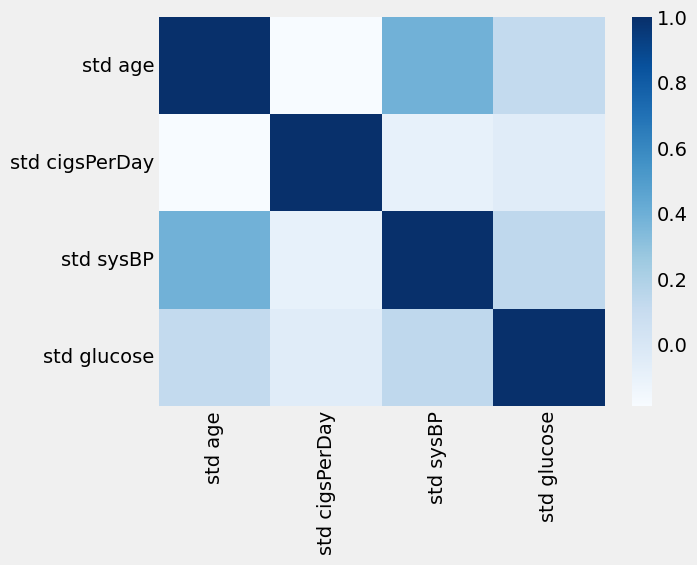

In [13]:
import seaborn as sns
sns.heatmap(fhd_df[predictors].corr(), cmap='Blues');
# fhd_df[cat_cols+num_cols].corr();


|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_comment.png?raw=true" width="50" height=""> | Not terrible. Merits closer attention to the contribution of age and BP <br> (bootstrap and look at the empirical distributions of the coefficients, <br> look at models with one of these predictors or the other, <br> decorrelate the features, etc.). |

<br> 
<br>    
<br>


## Interpreting the coefficients of logistic regression 

(seel also review notebook) 


$$ odds\_ratio = \frac{odds \text{ of event} \left. \right| \text{condition A}}{odds  \text{ of event} \left. \right| \text{condition B}} $$ 


* **Odds Ratio $> 1$:** The odds of the event are higher for condition A, <br> e.g., odds of severe symptoms are higher without a vaccine.





$$ \boxed{ \ \ x_j \to x_j+1 \ \ \ \text{ and all else stays the same } \ \rightarrow \ \text{ New } odds =  \text{ Old } odds \ \times \ e^{\ \beta_j} } \ \ $$


In other words: 
### $\beta_j$ is the log odds ratio for increasing $x_j$ by one unit. 

<br/> 



<!--- 
<details><summary><button> $\leftarrow$ Click there the see the calculation</button></summary> 
--->

Consider the event $\hat y=1$ (predicted 'positive') under two conditions:  $x_j=c$ and $x_j = c+1$. <br/> 
That is, **predictor $j$ increases by $1$ unit**.  
    
Let $e^{-\left(\beta_0 + \beta_1 x_1 + \dots \beta_j x_j + \dots \right)} = {\cal E}$     

$\begin{eqnarray}
odds \left. \right| x_j &=& \frac{p  \left. \right| x_j}{1- p \left. \right| x_j} = \frac{1 / \left[ 1 + e^{-\left( \beta_0 + \beta_1 x_1 + \dots + \beta_j x_j + \dots \right)}\right]}{1 - 1 / \left[ 1 + e^{-\left( \beta_0 + \beta_1 x_1 + \dots + \beta_j x_j + \dots \right)}\right] } \\
&=& \frac{1 / (1+ {\cal E})}{1 - 1/(1+{\cal E})} = \frac{1}{(1+{\cal E})-1} = \frac 1{{\cal E}} \\ 
&& \\ && \\
odds \left. \right| \left( x_j+1\right) &=& \frac{p  \left. \right| \left( x_j+1\right)}{1-  p \left. \right| \left( x_j+1\right)} = \frac{1 / \left[ 1 + e^{-\left( \beta_0 + \beta_1 x_1 + \dots + \beta_j x_j + \beta_j + \dots \right)}\right] }{1 - 1 / \left[ 1 + e^{-\left( \beta_0 + \beta_1 x_1 + \dots + \beta_j x_j + \beta_j + \dots \right)}\right] } \\
&=& \frac{1 / (1+ {\cal E e^{-\beta_j}})}{1 - 1/(1+{\cal E} e^{-\beta_j})} = \frac{1}{(1+{\cal E} e^{-\beta_j})-1} = \frac 1{{\cal E} e^{-\beta_j}} = \frac{1}{{\cal E}} \ e^{\beta_j} \\ 
&& \\ && \\ && \\ && \\
\rightarrow odds\_ratio_j &=& \frac 1{{\cal E}} \ e^{\beta_j}  \ \ {\Huge / } \ \ \frac 1{{\cal E}} = \boxed{ \ e^{\ \beta_j} \ } 
\end{eqnarray}$
</details>

<br>



## The Loss function: Logistic Regression and Maximum Likelihood Estimation

### What likelihood function would make sense? 

Consider the following likelihood function: 

$$ {\cal L} = \prod_{i \ s.t. \ y_i=1} \hat p_i \ \prod_{i \ s.t. \ y_i=0} \left( 1 - \hat p_i \right) \ \  = \ \ \prod_{i=1}^N  \hat p_i^{\ y_i} \ \left( 1 - \hat p_i \right)^{1-y_i} \hspace{15mm} \text{ where } y_i \in \{ 0,1\}$$ 

* $ {\cal L}(\{y_i\},\{\hat p_i\})$ only depends on the true outcomes and the predictions. 
* For records labeled $1$, we would like $\hat p$ to be as large as possible. <br/> The larger $\hat p$ is for these records, the larger ${\cal L}$ gets. 
* For records labeled $0$, we would like $\hat p$ to be as small as possible. <br/> The smaller $\hat p$ is for these records, the larger $(1-\hat p)$ and therefore the larger ${\cal L}$ gets. 

$\rightarrow$ ${\cal L}$ is **maximal** when the parameters of the model ($\beta_0, \beta_1, \beta_2, \dots$) yield the best predicted probabilities possible! 

 $$ \text{And so is the log likelihood: } \hspace{10mm} \log {\cal L} = \sum_{i=1}^N  \left[ y_i \log \hat p_i \ + \ \left( 1-y_i \right) \log \left( 1 - \hat p_i \right) \right] $$ 
 


### How is this likelihood function maximized? 
* Unlike linear regression, there is no analytical solution for the optimal parameters ($\beta_0, \beta_1, \beta_2, \dots$ that maximize $\log {\cal L}$).   
* There is an algorithm, the [Newton-raphson method for optimization](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization), that fits the model numerically: 
    * Start with a random set of parameters.
    * Takes into account the derivatives (gradient) of ${\cal L}$ to create an updating rule (difference equation).
    * Sequentially improve the parameters by updating them such that ${\cal L}$ increases.
    * Stop when the values of the parameters converge, i.e., when the updating rule does not change them much anymore. 
    
This algorithm **typically converges rapidly** to the optimal fit. 

For more, see [here](https://arunaddagatla.medium.com/maximum-likelihood-estimation-in-logistic-regression-f86ff1627b67). 

## Multinomial logistic regression 

What if our labels can take on multiple (>2) classes?

Define our label to be a [**one-hot-encoded**](https://en.wikipedia.org/wiki/One-hot) (or dummy) vector, e.g.,
$$ y_i = 
\begin{bmatrix}
0 \\
0 \\
1\\
\vdots   \\
0
\end{bmatrix}
$$

where $y_i^k = 1$ means that unit $i$ belongs to label class $k$.
### Is logistic regression limited to two classes (labels)? 

Strictly speaking yes, but... 

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | The **multinomial logistic regression** is a modification of logistic regression. <br> It uses the softmax function, a generalization of the logistic function that <br> accommodates multiple outputs, $p_k$, such that $\forall k \ \ 0 \leq p_k \leq 1$ and $\sum_k p_k = 1$: |

Define the **matrix** of coefficients

$$
B = 
\begin{bmatrix}
\beta_1^1 & \beta_2^1 & \cdots & \beta_p^1 \\
\beta_1^2 & \beta_2^2 & \cdots & \beta_p^2 \\
\vdots    & \vdots    & \ddots & \vdots    \\
\beta_1^K & \beta_2^K & \cdots & \beta_p^K
\end{bmatrix}
$$

Each possible label $k$ will have its own intercept $\beta_0^k$ and vector of coefficients $\beta^k_p \dots \beta^k_p$.

$$
P(y_i^k = 1 \mid x_i) = \frac{\exp(\beta_0^k + \beta_1^k x_i^1 + \dots + \beta_p^k x_p^1)}{\sum_{\ell=1}^K \exp(\beta_0^\ell + \beta_1^\ell x_i^1 + \dots + \beta_p^\ell x_p^1)} 
$$


This equation is sometimes called the **[softmax function](https://en.wikipedia.org/wiki/Softmax_function)**, which takes in a real-valued vector, and outputs a probability vector:

$$
\textrm{softmax}(Bx_i) = \frac{\exp(\beta_0^k + \beta_1^k x_i^1 + \dots + \beta_p^k x_p^1)}{\sum_{\ell=1}^K \exp(\beta_0^\ell + \beta_1^\ell x_i^1 + \dots + \beta_p^\ell x_p^1)} 
$$




The loss function used is called **[cross entropy](https://en.wikipedia.org/wiki/Cross-entropy)** : 

$${\large 
\begin{eqnarray} 
{\cal L}(Y, X) &=&  -\sum_i \ \sum_{\ell=k}^{K} y_i^k  \log \left[ P(y_i^k = 1 \mid x_i) \right] \\
&& \\ 
&=&  -\sum_i \ \sum_{\ell=k}^{K} y_i^k  \log \left( \widehat p_k \right) 
\end{eqnarray}
}$$

* Cross entropy is the *generalization of the log-likelihood we have seen for logistic regression*. 
* Cross entropy is zero when two distributions are identical and larger the more 'different' they are (remember that $y^k_i \in \{ 0,1\}$):  

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_comment.png?raw=true" width="50" height=""> | Multinomial logistic regression is **not** often used because it performs <br> less well than other classifiers. For instance, fluctuations can <br> disproportionately effect the predicted probabilities.   |

* That said, the [**softmax**](https://en.wikipedia.org/wiki/Softmax_function) and [**cross entropy**](https://en.wikipedia.org/wiki/Cross-entropy) functions are useful elsewhere and it is not a bad idea to know about them. 



## So what can we use for multiple classes when the assumptions of Naive Bayes are too strong? 

Well... There are networks... 

But there are some simpler classifiers that one can try. 


<img src="https://github.com/david-biron/DATA221imgs/blob/main/MLalgorithms_Classifiers.png?raw=true" width="300" height="">
